In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

2023-09-11 00:12:11.134742: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
# save the figure
flag_save = True

In [2]:
target_dir = "./out/"
for name in sorted(os.listdir(target_dir)):
    print(name)

2023-09-07_17-28-26_df1-2-3_1it-POST
2023-09-07_18-41-29_df8-9_5it-POST
2023-09-07_19-51-16_df1-2-3-4-5-6-7-8-9-10_1it-POST
2023-09-07_23-32-38_df1-2-3-4-5-6-7-8-9-10_1it-POST
2023-09-08_02-31-32_df1-2-3-4-5-6-7-8-9-10_500it-POST
2023-09-09_02-13-05_df1-2-3-4-5-6-7-8-9-10_350it-POST
2023-09-09_17-34-04_df1-2-3-4-5-6-7-8-9-10-LINLOG-POST
2023-09-10_21-55-29_df6-7_1it-both
2023-09-10_23-27-53_df1-2-3-4-5-6-7-8-9-10-LINLOG-both
2023-09-10_23-55-02_all


## Load NN info

In [3]:
file_nn = "2023-09-08_02-31-32_df1-2-3-4-5-6-7-8-9-10_500it-POST"

In [4]:
path = target_dir + file_nn
for name in sorted(os.listdir(path)):
    print(name)

08 SGD - v0 in all dfs post and with all NN - Jupyter Notebook.pdf
info_alldataset.txt
v0_df1-2-3-4-5-6-7-8-9-10_500it_NN-02.svg
v0_df1-2-3-4-5-6-7-8-9-10_500it_NN-04.svg
v0_df1-2-3-4-5-6-7-8-9-10_500it_NN-10.svg
v0_df1-2-3-4-5-6-7-8-9-10_500it_NN-ALL.svg
v0_df1-2-3-4-5-6-7-8-9-10_500iter_NN-ALL-comparing.svg


In [5]:
namefile = '/info_alldataset.txt'

In [6]:
# get the header
with open(path + namefile) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]
header

['t_list',
 'x_list',
 'v_list',
 'v0_scn',
 'v0_scn_mean',
 'n_scn',
 'N. file',
 'iter',
 'DOE',
 'processed']

In [7]:
NUM_ITER = int(file_nn.split("_")[-1].split("it")[0])
NUM_ITER

500

In [8]:
info_nn = pd.read_csv(path + namefile, sep=',', usecols= header)

In [9]:
info_nn

,t_list,x_list,v_list,v0_scn,v0_scn_mean,n_scn,N. file,iter,DOE,processed
0,"[14.240000000000002, 14.290000000000003, 14.34...","[array([47.39131046, 48.74372173, 50.096133 ,...","[[27.04822540283203, 28.37846565246582, 27.676...","[30, 29.921209272631124, 29.84504490284121, 29...",27.778101,0,1,500,"[1, 2, 1]",post
1,"[23.64, 23.69, 23.740000000000002, 23.79000000...","[array([39.20354853, 40.53283673, 41.86212493,...","[[26.585763931274414, 25.34468650817871, 30.98...","[30, 30.03948068730416, 30.077645351698177, 30...",31.113355,1,1,500,"[1, 2, 1]",post
2,"[72.44, 72.49, 72.53999999999999, 72.59, 72.64...","[array([ 2.73338702, 4.04771588, 5.36204474,...","[[26.286577224731445, 29.519899368286133, 28.5...","[30, 29.941697349840737, 29.88533812135341, 29...",28.355865,2,1,500,"[1, 2, 1]",post
3,"[84.24000000000001, 84.29, 84.34, 84.390000000...","[array([21.74922515, 23.12561141, 24.50199767,...","[[27.527725219726562, 26.87315559387207, 29.90...","[30, 29.983145519027797, 29.966852854088017, 2...",29.574075,3,1,190,"[1, 2, 1]",post
4,"[131.64, 131.69, 131.74, 131.79, 131.84, 131.8...","[array([29.92533961, 31.38577853, 32.84621745,...","[[29.208778381347656, 28.70818519592285, 28.44...","[30, 29.9480964210731, 29.897922961443907, 29....",28.536319,4,1,500,"[1, 2, 1]",post
...,...,...,...,...,...,...,...,...,...,...
619,"[483.92, 483.97, 484.02, 484.07, 484.12, 484.1...","[array([48.41808799, 48.87877796, 49.33946794,...","[[9.213799476623535, 10.958330154418945, 22.61...","[30, 29.75396388691982, 29.516128977608922, 29...",23.061782,17,10,500,"[1, 10, 1]",post
620,"[531.72, 531.77, 531.82, 531.8700000000001, 53...","[array([41.40738261, 41.94955972, 42.49173682,...","[[10.843542098999023, 4.979713439941406, 18.20...","[30, 29.60683911392471, 29.226783590718448, 28...",18.912863,18,10,500,"[1, 10, 1]",post
621,"[202.52, 202.57, 202.62, 202.67000000000002, 2...","[array([28.41048427, 29.80286851, 31.19525276,...","[[27.847684860229492, 27.818811416625977, 27.7...","[30, 29.850353129658785, 29.70444743107601, 29...",24.492994,19,10,500,"[1, 10, 1]",post
622,"[342.92, 342.97, 343.02, 343.07, 343.12, 343.1...","[array([30.1618309 , 30.94979901, 31.73776712,...","[[15.75936222076416, 14.911964416503906, 15.82...","[30, 29.63678726055011, 29.28265483958656, 28....",16.633767,20,10,500,"[1, 10, 1]",post


## Load Lin/Log info

In [10]:
file_linlog = "2023-09-10_23-27-53_df1-2-3-4-5-6-7-8-9-10-LINLOG-both"

In [11]:
path = target_dir + file_linlog
for name in sorted(os.listdir(path)):
    print(name)

info_data.txt
v0_df1-2-3-4-5-6-7-8-9-10_1.svg


In [12]:
namefile = '/info_data.txt'

In [13]:
# get the header
with open(path + namefile) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]
header

['t_list',
 'x_list',
 'v0_scn',
 'L_scn',
 'n_scn',
 'N. file',
 'LWR_flag',
 'processed']

In [14]:
info_linlog = pd.read_csv(path + namefile, sep=',', usecols= header)

In [15]:
info_linlog

,t_list,x_list,v0_scn,L_scn,n_scn,N. file,LWR_flag,processed
0,"[2.24, 2.29, 2.34, 2.39, 2.44, 2.49, 2.54, 2.5...","[array([ 6.54115583, 8.08862013, 9.63622603,...",32.524004,2.114480,0,1,Lin,pre
1,"[16.44, 16.490000000000002, 16.54, 16.59, 16.6...","[array([25.56044125, 26.8471916 , 28.13404136,...",27.026377,2.000000,1,1,Lin,pre
2,"[33.440000000000005, 33.49, 33.540000000000006...","[array([29.01531893, 30.33136515, 31.64823598,...",30.000000,5.000000,2,1,Lin,pre
3,"[37.440000000000005, 37.49, 37.540000000000006...","[array([42.18965274, 43.43449131, 44.68247025,...",29.109448,2.000000,3,1,Lin,pre
4,"[44.24, 44.290000000000006, 44.34, 44.39, 44.4...","[array([43.43569439, 44.76042962, 46.08598381,...",29.381092,2.477765,4,1,Lin,pre
...,...,...,...,...,...,...,...,...
1753,"[483.92, 483.97, 484.02, 484.07, 484.12, 484.1...","[array([48.41808799, 49.07859769, 49.71023394,...",20.562972,6.152108,17,10,Log,post
1754,"[531.72, 531.77, 531.82, 531.8700000000001, 53...","[array([41.40738261, 42.27074604, 43.08740904,...",16.686215,7.865685,18,10,Log,post
1755,"[202.52, 202.57, 202.62, 202.67000000000002, 2...","[array([28.41048427, 29.50190442, 30.56792656,...",16.839341,2.052664,19,10,Log,post
1756,"[342.92, 342.97, 343.02, 343.07, 343.12, 343.1...","[array([30.1618309 , 31.9831215 , 33.5941289 ,...",30.000000,5.000000,20,10,Log,post


## Plot

In [16]:
# To better handling the df
df = pd.concat([info_nn, info_linlog], sort=False)

In [17]:
df

,t_list,x_list,v_list,v0_scn,v0_scn_mean,n_scn,N. file,iter,DOE,processed,L_scn,LWR_flag
0,"[14.240000000000002, 14.290000000000003, 14.34...","[array([47.39131046, 48.74372173, 50.096133 ,...","[[27.04822540283203, 28.37846565246582, 27.676...","[30, 29.921209272631124, 29.84504490284121, 29...",27.778101,0,1,500.0,"[1, 2, 1]",post,NaN,NaN
1,"[23.64, 23.69, 23.740000000000002, 23.79000000...","[array([39.20354853, 40.53283673, 41.86212493,...","[[26.585763931274414, 25.34468650817871, 30.98...","[30, 30.03948068730416, 30.077645351698177, 30...",31.113355,1,1,500.0,"[1, 2, 1]",post,NaN,NaN
2,"[72.44, 72.49, 72.53999999999999, 72.59, 72.64...","[array([ 2.73338702, 4.04771588, 5.36204474,...","[[26.286577224731445, 29.519899368286133, 28.5...","[30, 29.941697349840737, 29.88533812135341, 29...",28.355865,2,1,500.0,"[1, 2, 1]",post,NaN,NaN
3,"[84.24000000000001, 84.29, 84.34, 84.390000000...","[array([21.74922515, 23.12561141, 24.50199767,...","[[27.527725219726562, 26.87315559387207, 29.90...","[30, 29.983145519027797, 29.966852854088017, 2...",29.574075,3,1,190.0,"[1, 2, 1]",post,NaN,NaN
4,"[131.64, 131.69, 131.74, 131.79, 131.84, 131.8...","[array([29.92533961, 31.38577853, 32.84621745,...","[[29.208778381347656, 28.70818519592285, 28.44...","[30, 29.9480964210731, 29.897922961443907, 29....",28.536319,4,1,500.0,"[1, 2, 1]",post,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1753,"[483.92, 483.97, 484.02, 484.07, 484.12, 484.1...","[array([48.41808799, 49.07859769, 49.71023394,...",NaN,20.562972,NaN,17,10,NaN,NaN,post,6.152108,Log
1754,"[531.72, 531.77, 531.82, 531.8700000000001, 53...","[array([41.40738261, 42.27074604, 43.08740904,...",NaN,16.686215,NaN,18,10,NaN,NaN,post,7.865685,Log
1755,"[202.52, 202.57, 202.62, 202.67000000000002, 2...","[array([28.41048427, 29.50190442, 30.56792656,...",NaN,16.839341,NaN,19,10,NaN,NaN,post,2.052664,Log
1756,"[342.92, 342.97, 343.02, 343.07, 343.12, 343.1...","[array([30.1618309 , 31.9831215 , 33.5941289 ,...",NaN,30.0,NaN,20,10,NaN,NaN,post,5.000000,Log


In [18]:
ms2kmh = 3.6
DOE =[[1,2,1], [1,4,1], [1,10,1]] #Design of experiment

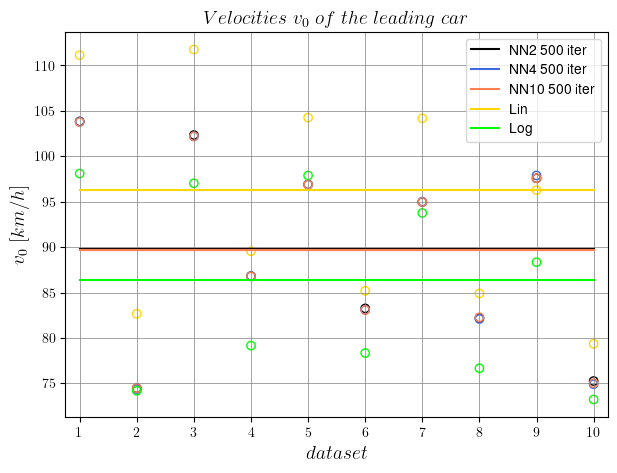

In [19]:
# Initialize the figure
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

ms2kmh = 3.6

palette = ['black', 'royalblue', 'coral']
lin_color, log_color = 'gold', 'lime'

## NN model
for step, d in enumerate(DOE):   
        
    # get the right df
#     info_dataset = info_nn.loc[info_nn['DOE'].isin([d])]
    info_dataset = info_nn.loc[info_nn['DOE'].isin([str(d)])]
    color = palette[step]

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.scatter(nf, p['v0_scn_mean']*ms2kmh, facecolors='none', edgecolors=color)

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
    label = "NN" + str(d[1]) + f" {NUM_ITER} iter"
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = color, label=label)
    

## LIN LOG
for key, grp in info_linlog.groupby(['LWR_flag','N. file']):
    tmp = grp.mean(numeric_only=True)
    nf = key[1]
    match key[0]:
        case 'Lin':
            ax.scatter(nf, tmp['v0_scn']*ms2kmh, facecolors='none', edgecolors=lin_color)
        case 'Log':
            ax.scatter(nf, tmp['v0_scn']*ms2kmh, facecolors='none', edgecolors=log_color)

for key, grp in info_linlog.groupby('LWR_flag'):
    tmp = grp.mean(numeric_only=True)
    
    xrange = [i for i in range(1,11)]
    yval = [tmp['v0_scn']*ms2kmh] * len(xrange) 
    match key:
        case 'Lin':
            ax.plot(xrange, yval, color = lin_color, label = key)
        case 'Log':
            ax.plot(xrange, yval, color = log_color,  label = key)


ax.set_xlabel(r"$data set$",fontsize=14)
ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$",fontsize=14)

xlim = [0.75,10.25]
ax.set_xlim(xlim)
ax.set_xticks(range(1,11))
ylim = ax.get_ylim()

ax.legend()
ax.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()

## Table

In [20]:
table = info_linlog.groupby(['LWR_flag','N. file']).mean(numeric_only=True)
table = table.drop('n_scn', axis=1)

In [21]:
table

v0_scn     L_scn
LWR_flag N. file                     
Lin      1        30.871231  2.686938
         2        22.961697  4.195650
         3        31.044746  3.298358
         4        24.875075  4.007313
         5        28.961309  2.852913
         6        23.664330  4.127842
         7        28.940336  3.878977
         8        23.583157  5.641523
         9        26.742957  3.373680
         10       22.042885  4.126083
Log      1        27.250843  7.461859
         2        20.604791  7.762319
         3        26.951432  8.072034
         4        21.987117  8.303576
         5        27.190330  7.150815
         6        21.759684  7.100685
         7        26.044437  7.216133
         8        21.294281  8.884768
         9        24.538608  7.229816
         10       20.339509  6.826095

In [22]:
for flag, grp in info_linlog.groupby('LWR_flag'):
    print(f"For {flag}-model: the average for L is {grp['L_scn'].mean()}")

For Lin-model: the average for L is 3.7687534367350386
For Log-model: the average for L is 7.706877754699963


## Prepare the out dir

In [24]:
# Create the directory..
if flag_save:
    
    ext = ".svg"
    
    # Create directory where to save the image
    now = datetime.now() 
    d = now.strftime(f"%Y-%m-%d_%H-%M-%S_all")
    
    path = 'out/' + d
    os.mkdir(path)

In [25]:
# Save figure
if flag_save:

    title = f"/v0_plot"     
    fig.savefig(path+title+ext, bbox_inches='tight')